# Por: Juan Esteban Ospina Holguín y Mariana Toro Escobar.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from scipy import optimize

# Problemas 

#1. Area 
Hallar el área de un segmento circular cuya area sea igual a una cuarta parte del área del circulo. Para la solución se sugiere lo siguiente:

a) Encontrar la ecuacion trascendental.

b) Con la ecuación anterior, definir una funcion $f(\theta)=0$. Emplee la funcion labmda de python.

c) Construir una data frame de pandas con la columna "theta" con 1000 registros(filas) entre $[-2\pi, 2\pi]$. Sugerencia, para construir el data frame emplee la función linspace como sigue : np.linspace(-2*np.pi, 2*np.pi, 1000 )

d) Construir una segunda columna titulada "F_theta" con los registros f(theta)

f) Realice un gráfico de  "F_theta" vs "theta". Identifique el intervalo de la raiz.

Estime el valor del ángulo empleando los siguientes metodos(Emplee  la documentacion):

g) [Bisección](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html)

h) [Newton-Rapshon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html)

i) [Secante](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html) 

j) [Punto Fijo](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fixed_point.html)




**Solución:**

**a)** Ecuación trascendental:

Considerando el área del cono y la del triángulo, respectivamente como
\begin{equation}
A_{c}= \frac{R^2\theta}{2} \\
A_{t}= (sin\frac{\theta}{2})(cos\frac{\theta}{2}) R^2
\end{equation}

Se obtiene el área de la región circular a partir de la resta del área del triángulo en la del cono
\begin{equation}
A=\frac{R^2\theta}{2} - (sin\frac{\theta}{2})(cos\frac{\theta}{2}) R^2
\end{equation}

Luego, considerando que esta es igual a un cuarto del área de un círculo
\begin{equation}
\frac{\pi R^2}{4}=\frac{R^2\theta}{2} - (sin\frac{\theta}{2})(cos\frac{\theta}{2}) R^2 \\
\frac{\pi}{2}= \theta- 2(sin\frac{\theta}{2})(cos\frac{\theta}{2})  \textbf{[1]}
\end{equation}

Se tiene en cuenta para [1] la siguiente identidad trigonométrica
\begin{equation} 
sin\theta=2(sin\frac{\theta}{2})(cos\frac{\theta}{2})
\end{equation}

Por último, se consigue la ecuación
\begin{equation}
\frac{\pi}{2} =\theta-sin\theta
\end{equation}




**b)** Definir una funcion  $f(\theta)=0$:

Se tiene que 
\begin{equation}
f(\theta)= \theta- \sin \theta - \frac{\pi}{2}=0
\end{equation}

In [ ]:
f = lambda theta: theta-np.sin(theta)-np.pi/2 #Usando la función lambda

**c)** Construir data frame de pandas con la columna "theta" con 1000 registros(filas) entre  [−2π,2π] .

In [ ]:
theta=np.linspace(-2*(np.pi),2*(np.pi),1000) #Número de registros

df = pd.DataFrame() #Data frame
df["theta"] = theta
df

,theta
0,-6.283185
1,-6.270606
2,-6.258027
3,-6.245448
4,-6.232870
...,...
995,6.232870
996,6.245448
997,6.258027
998,6.270606


**c)** Construir una segunda columna titulada "F_theta" con los registros f(theta)

In [ ]:
df["F_theta"] = f(theta) #Nueva columna
df

,theta,F_theta
0,-6.283185,-7.853982
1,-6.270606,-7.853981
2,-6.258027,-7.853979
3,-6.245448,-7.853973
4,-6.232870,-7.853960
...,...,...
995,6.232870,4.712368
996,6.245448,4.712380
997,6.258027,4.712386
998,6.270606,4.712389


**d)** Realizar un gráfico de "F_theta" vs "theta"

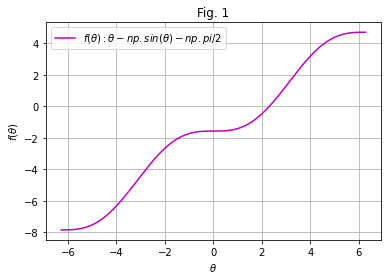

In [ ]:
plt.figure()
plt.plot(df["theta"], df["F_theta"], c="m", label="$f(\\theta): \\theta-np.sin(\\theta)-np.pi/2$")
plt.title("Fig. 1")
plt.xlabel("$\\theta$")
plt.ylabel("$f(\\theta)$")
plt.legend()
plt.grid()
plt.show()

Estimar el valor del ángulo:

**g)** Bisección:

In [ ]:
root1 = optimize.bisect(f, 0, 4)
print("θ=", root1)

θ= 2.309881460010729


**h)** Newton-Rapshon:

In [ ]:
df = lambda theta: 1-np.cos(theta) #Derivada 
root2 = optimize.newton(f, 2, df, args=(), tol=1.48e-08, maxiter=1000, fprime2=None, x1=None, rtol=0.0, full_output=False, disp=True)
print("θ=", root2)

θ= 2.3098814600100575


**i)** Secante:

In [ ]:
root3 = optimize.newton(f, 2, fprime=None, args=(), tol=1.48e-08, maxiter=50, fprime2=None, x1=None, rtol=0.0, full_output=False, disp=True)
print("θ=", root3)

θ= 2.309881460010033


**j)** Punto fijo:

In [ ]:
g = lambda theta: 2*theta-np.sin(theta)-np.pi/2 #Nueva función g(θ)
root4 = optimize.fixed_point(g, 2, args=(), xtol=1e-08, maxiter=100, method='del2')
print("θ=", root4)

θ= 2.309881460010057





# 2. Movimiento de proyectiles en presencia de viento.

Supongamos que un proyectil es lanzado desde el origen con una rapidez $v=vo( \cos \theta , \sin \theta $. Supongamos además que el efecto del viento sobre el proyectil es el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Teniendo presente que si u es la velocidad del viento y $\alpha$ el ángulo que hace dirección de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones diferenciales, asociada al estado de movimiento del [proyectil](https://iopscience.iop.org/article/10.1088/0143-0807/36/2/025016/meta):


\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_x-u\sin \alpha ),
\end{equation}

donde b es el párametro de rozamiento. La soluciones a las ecuaciones anteriores vienen dadas por:

Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html


```



1. Defina dos funciones, una para x y otra para y. 

`
2. Construya un diccionario con las claves "X", "Y", "Tiempo"

3. Con el diccionario construya un data frame de pandas llamado df con los nombres de columnas "X", "Y", "Tiempo"  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html. Defina 1000 regitros para el intervalo de tiempo elegido.


4. Realice un gráfico de x como función del tiempo, de y como función del tiempo y la trayectoria de la partícula (df["X"], df["tiempo"], df["Y"]).


5. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numéricamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.  

6. Construya una  grafica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 80 grados cada 5 grados.

7. Realice una interpolacion de R como función de theta.









**Solución:**

**0)** Definir parámetros iniciales:

In [ ]:
v0 = 60                    #Velocidad en m/s
alpha = np.pi              #Angulo del viento
theta = np.deg2rad(45)    
u =0                        #rapidez del viento
b = 0.05                   #Parametro de friccion 
g = 9.8                    #Aceleracion de la gravedad m/s2

Params = (alpha, v0, b, u, g)  #Parametros en tupla. Angulo de lanzamiento

**1)** Definir funciones para X y Y:

In [ ]:
def pos_x(t, theta, alpha, v0, b, u, g): #Posición en x
  x = (u*np.cos(alpha))*t+(1./b)*(v0*np.cos(theta)-u*np.cos(alpha))*(1-np.e**(-b*t))             
  return x
    
def pos_y(t, theta, alpha, v0, b, u,g): #Posición en y
  y = (1./b)*((g/b)+v0*np.sin(theta)-u*np.sin(alpha))*(1-np.e**(-b*t))-((g/b)-u*np.sin(alpha))*t 
  return y

**2)** Diccionario con las claves "X", "Y", "Tiempo":

In [ ]:
t = np.linspace(0, 20, 100)  
x = pos_x(t, theta, *Params)
y = pos_y(t, theta, *Params) 
pos = { "X": x , "Y": y, "Tiempo": t } #Diccionario
pos

{'Tiempo': array([ 0.        ,  0.2020202 ,  0.4040404 ,  0.60606061,  0.80808081,
         1.01010101,  1.21212121,  1.41414141,  1.61616162,  1.81818182,
         2.02020202,  2.22222222,  2.42424242,  2.62626263,  2.82828283,
         3.03030303,  3.23232323,  3.43434343,  3.63636364,  3.83838384,
         4.04040404,  4.24242424,  4.44444444,  4.64646465,  4.84848485,
         5.05050505,  5.25252525,  5.45454545,  5.65656566,  5.85858586,
         6.06060606,  6.26262626,  6.46464646,  6.66666667,  6.86868687,
         7.07070707,  7.27272727,  7.47474747,  7.67676768,  7.87878788,
         8.08080808,  8.28282828,  8.48484848,  8.68686869,  8.88888889,
         9.09090909,  9.29292929,  9.49494949,  9.6969697 ,  9.8989899 ,
        10.1010101 , 10.3030303 , 10.50505051, 10.70707071, 10.90909091,
        11.11111111, 11.31313131, 11.51515152, 11.71717172, 11.91919192,
        12.12121212, 12.32323232, 12.52525253, 12.72727273, 12.92929293,
        13.13131313, 13.33333333, 13.5353

**3)** Data frame de pandas llamado df con los nombres de columnas "X", "Y", "Tiempo":

In [ ]:
df = pd.DataFrame.from_dict(pos)
df

,X,Y,Tiempo
0,0.000000,0.000000,0.000000
1,8.527849,8.328541,0.202020
2,16.969991,16.175433,0.404040
3,25.327289,23.545516,0.606061
4,33.600594,30.443582,0.808081
...,...,...,...
95,523.501453,-819.661385,19.191919
96,526.768025,-840.899979,19.393939
97,530.001767,-862.323067,19.595960
98,533.203010,-883.928796,19.797980


**4)** Gráfico de x como función del tiempo, de y como función del tiempo y la trayectoria de la partícula (df["X"], df["tiempo"], df["Y"]):

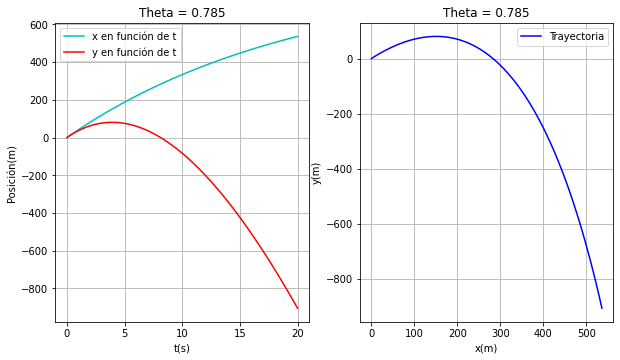

In [ ]:
plt.figure(figsize=(10,5.5))
plt.subplot(121)
plt.plot(df["Tiempo"], df["X"], color="c", label="x en función de t") #x en función del tiempo
plt.plot(df["Tiempo"], df["Y"], color="r", label="y en función de t") #y en función del tiempo
plt.xlabel("t(s)")
plt.ylabel("Posición(m)")
plt.title("Theta = " + str("%.3lf"%theta))
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(df["X"], df["Y"], color="b", label="Trayectoria") #Trayectoria
plt.xlabel("x(m)")
plt.ylabel("y(m)")
plt.legend()
plt.title("Theta = " + str("%.3lf"%theta))
plt.grid()
plt.show()

**5)** Alcance máximo de la partícula:

In [ ]:
#Hallando el tiempo en el que la partícula llega al suelo
tf = optimize.newton(pos_y, 10, args=(theta, alpha, v0, b, u,g)) #y=0
print("La partícula cae al suelo a los:", tf, "s") 

#Obteniendo el alcance horizontal máximo
xm = pos_x(tf, theta, alpha, v0, b, u, g) #Reemplazando en pos_x
print("El alcance horizontal máximo es de:", xm, "m")

La partícula cae al suelo a los: 8.11162702209557 s
El alcance horizontal máximo es de: 282.9084656218106 m


**6)** Gráfica del alcance máximo R como función de $\theta$, varíe $\theta$  entre 10 y 80 grados cada 5 grados:


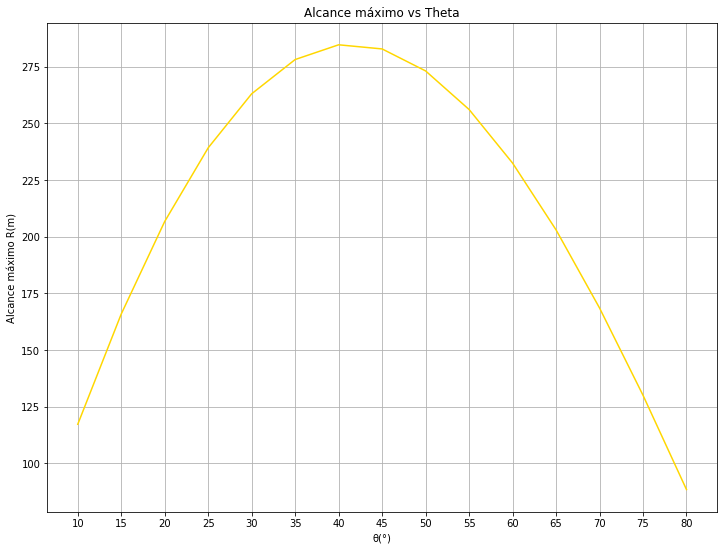

In [ ]:
th1 = np.arange(10, 80+5, 5)
th = np.radians(th1)          #Radianes
am = np.zeros(len(th))        #Alcances máximos
for i in range(th.size): 
  tam = optimize.newton(pos_y, 10, args=(th[i], alpha, v0, b, u,g))  #t en el que la partícula llega al suelo
  am[i] = pos_x(tam, th[i], alpha, v0, b, u, g)     #Alcance máximo para theta[i]

plt.figure(figsize=(12,9))
plt.plot(th1, am, color="gold")
plt.title('Alcance máximo vs Theta')
plt.xlabel("θ(°)")
plt.ylabel("Alcance máximo R(m)")
plt.xticks(th1)
plt.grid()

**7)** Interpolación de R como función de theta:

           14             13             12             11
4.963e-28 x  - 3.947e-25 x  + 1.457e-22 x  - 3.212e-20 x 
              10             9             8             7
 + 4.365e-18 x  - 2.678e-16 x - 2.848e-14 x + 9.343e-12 x
              6             5             4            3           2
 - 1.059e-09 x + 4.536e-09 x + 1.983e-05 x - 0.002035 x - 0.09135 x + 12.82 x - 7.277e-07


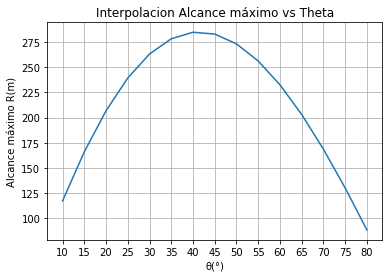

In [ ]:
from scipy.interpolate import lagrange
AM = lagrange(th1,am)  
print (AM)
plt.figure()
plt.plot(th1,AM(th1))
plt.title('Interpolacion Alcance máximo vs Theta')
plt.xlabel("θ(°)")
plt.ylabel("Alcance máximo R(m)")
plt.xticks(th1)
plt.grid()